# Assignment 8 - PCA

This notebook contains PCA Projections with the following dimensions:

- 2D Projection
- 3D Projection
- Dimensions with 95% of the variance ratio
- 2D Kernel PCA
- 3D Kernel PCA

For each, we create the principal components and look at the explained variance ratio. Then, we visualize the projection (if possible) and measure the reconstruction error when reversing the transformation.

In [1]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib as matplot
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy


print("Python ver: {}".format(sys.version))
print("Numpy ver: {}".format(np.__version__))
print("Pandas ver: {}".format(pd.__version__))
print("MatPlotLib ver: {}".format(matplot.__version__))
print("SeaBorn ver: {}".format(sns.__version__))
print("StatsModel ver: {}".format(sm.__version__))
print("Scipy ver: {}".format(scipy.__version__))
print("SkLearn ver: {}".format(sklearn.__version__))

Python ver: 3.8.5 (default, Jan 27 2021, 15:41:15) 
[GCC 9.3.0]
Numpy ver: 1.19.5
Pandas ver: 1.1.4
MatPlotLib ver: 3.3.3
SeaBorn ver: 0.11.1
StatsModel ver: 0.12.1
Scipy ver: 1.5.4
SkLearn ver: 0.24.1


In [2]:
import warnings

# Set Seaborn theme
sns.set_theme(color_codes=True)

# Disable warnings
warnings.simplefilter("ignore")

## 1. Data Preparation

### 1.1 Load the Data

In [3]:
try:
    data = pd.read_csv('../../datasets/AimoScoreWeakLinks_original_40P.csv')
    data = data.drop(columns=['Unnamed: 0', 'AimoScore'])
except IOError as e:
    print(e)

### 1.2 Standardizing the Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales (i.e PCA is very sensitive to scales). We can also convert the normalized features into a tabular format with the help of DataFrame.

In [4]:
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=["WeakLinks"])
y = data["WeakLinks"]

X = StandardScaler().fit_transform(X)
X.shape

(2091, 40)

In [5]:
print("Mean: \t",np.mean(X))
print("Std: \t",np.std(X))

Mean: 	 1.1167006529849973e-16
Std: 	 1.0


In [6]:
feat_cols = ['feature'+str(i) for i in range(X.shape[1])]
normalised_data = pd.DataFrame(X, columns=feat_cols)
normalised_data.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39
2086,0.154450,-0.381554,1.039620,0.486747,0.444600,-1.348108,0.652568,-0.748144,-0.583044,-1.205414,...,-0.849483,-0.572656,-0.589119,2.139921,1.683843,0.819714,-0.680573,1.161778,-1.324715,-1.278884
2087,1.039515,1.403992,0.315033,-0.391982,0.650071,-1.039654,-0.008001,-0.748144,-1.313151,-1.205414,...,-0.849483,-0.572656,-0.589119,-0.605599,-0.710697,-0.421921,-0.680573,-1.037075,-1.329970,-1.324499
2088,0.150454,-1.102215,1.011076,1.662613,0.841371,1.466321,0.425099,-0.026128,0.721978,-0.641718,...,2.102985,2.781925,-0.589119,-0.605599,-0.710697,-0.597974,-0.680573,0.815355,0.926306,1.096571
2089,-1.084242,-1.324349,-0.980442,-0.761592,1.599488,0.497391,1.500571,-0.748144,0.214078,1.701780,...,1.044258,-0.572656,2.286722,-0.605599,-0.402052,-0.597974,0.631195,1.715640,0.633761,0.731656
2090,0.106501,-0.683384,-0.844307,-1.247158,-1.206252,-0.593527,-1.108950,-0.748144,-0.972787,1.348777,...,-0.646583,-0.572656,0.374264,-0.605599,-0.710697,-0.597974,1.544683,-1.005959,-1.329970,-1.324499


## 2. 2D PCA Projection

### 2.1 Create the Projection

Our datasets has 30 predictors and we want to reduce that to 2 dimensions.

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [8]:
X2D_df = pd.DataFrame(data = X2D, columns = ['PC1', 'PC2'])
X2D_df = pd.concat([X2D_df, y], axis = 1)
X2D_df

,PC1,PC2,WeakLinks
0,-1.793991,0.639561,RightShoulderElevation
1,3.533416,-1.103302,RightArmFallForward
2,-1.942841,-1.818578,LeftArmFallForward
3,0.199008,3.021321,RightShoulderElevation
4,-2.890898,-0.708693,ForwardHead
...,...,...,...
2086,-1.611110,-0.340928,RightArmFallForward
2087,-3.459287,-2.567751,LeftArmFallForward
2088,-1.352888,2.235998,LeftArmFallForward
2089,6.449071,-1.416188,RightKneeMovesOutward


### 2.2 Explained variable ratio

From this output, we can observe that PC1 holds 14.5% of the information while PC2 holds 13.4%. Together, the first two principal components contain 27.9% and this means that when projecting our dataset to a two-dimensional data, over 70% of the information was lost.

In [9]:
print('Explained variation per principal component: {} \n'.format(pca.explained_variance_ratio_))
print('Together they hold {:.1f}% information from the original data.'.format(np.sum(pca.explained_variance_ratio_) * 100))

Explained variation per principal component: [0.18573691 0.12523668] 

Together they hold 31.1% information from the original data.


The following scree plot shows that with two principal components, we reach just a few percentages over 30% of the variance in the original data. That is a lot of information loss.

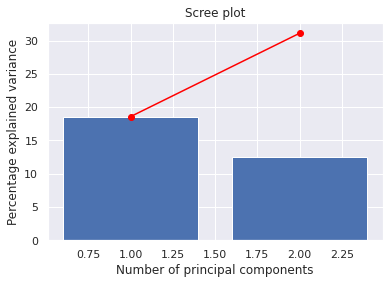

In [10]:
scree = pca.explained_variance_ratio_ * 100

plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(), c="red", marker='o')
plt.xlabel("Number of principal components")
plt.ylabel("Percentage explained variance")
plt.title("Scree plot")
plt.show()

### 2.3 Visualizing the 2D Projection

Visualizing the data samples along the principal component axis should give us an insight into how the samples are distributed among the two classes. 

From the resulting plot, we can observe that when we project the 14 weakest links to a two-dimensional space, a few classes (such as *RightKneeMovesOutward*) are easier to separate from the others. But most classes are spread out and difficult (impossible?) to clearly distinguish in this space. It's not possible to linearly separate all classes from each other.

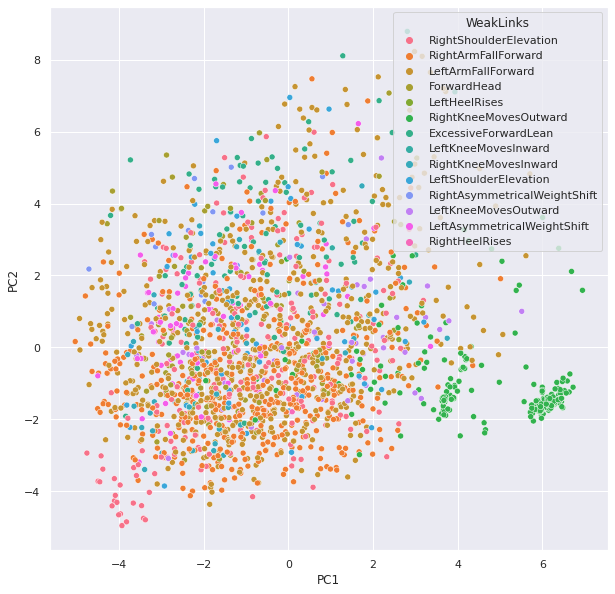

In [11]:
fig = plt.figure(figsize = (10,10))
sns.scatterplot(data=X2D_df, x="PC1", y="PC2", hue="WeakLinks")
plt.show()

### 2.4 Reverse the transformation and Measure the reconstruction error

One way to measure how well the algorithm has eliminated dimensions without loosing too much information is by measuring the reconstruction error.

In this case, the MSE is 0.69 so not close to 0 but we still don't have any other values to compare it to.

In [12]:
from sklearn.metrics import mean_squared_error

X2D_preimage = pca.inverse_transform(X2D)

mse_1 = mean_squared_error(X, X2D_preimage)
mse_1

0.6890264075716498

## 3. 3D PCA Projection

### 3.1 Create the Projection

We now try to reduce the original data to 3 dimensions.

In [13]:
pca_3 = PCA(n_components=3)
X3D = pca_3.fit_transform(X)

In [14]:
X3D_df = pd.DataFrame(data = X3D, columns = ['PC1', 'PC2', 'PC3'])
X3D_df = pd.concat([X3D_df, y], axis = 1)
X3D_df

,PC1,PC2,PC3,WeakLinks
0,-1.793991,0.639560,-0.461307,RightShoulderElevation
1,3.533416,-1.103302,-2.356598,RightArmFallForward
2,-1.942841,-1.818581,-1.283756,LeftArmFallForward
3,0.199008,3.021322,0.225834,RightShoulderElevation
4,-2.890899,-0.708688,1.629044,ForwardHead
...,...,...,...,...
2086,-1.611110,-0.340927,1.529008,RightArmFallForward
2087,-3.459287,-2.567748,1.747781,LeftArmFallForward
2088,-1.352888,2.235997,4.029567,LeftArmFallForward
2089,6.449071,-1.416190,0.728267,RightKneeMovesOutward


### 3.2 Explained variable ratio

From this output, we can observe that PC1 holds 18.6% of the information while PC2 holds 12.5% - as before. PC3 then holds just 9.5% of the information. 
Together, the first three principal components contain 40.6% so projecting our dataset to a three-dimensional data still looses around 60% of the information.

In [15]:
print('Explained variation per principal component: {} \n'.format(pca_3.explained_variance_ratio_))
print('Together they hold {:.1f}% information from the original data.'.format(np.sum(pca_3.explained_variance_ratio_) * 100))

Explained variation per principal component: [0.18573691 0.12523668 0.09489639] 

Together they hold 40.6% information from the original data.


The following scree plot shows that with three principal components, we reach just about 40% of the variance in the original data. Still a lot of information loss.

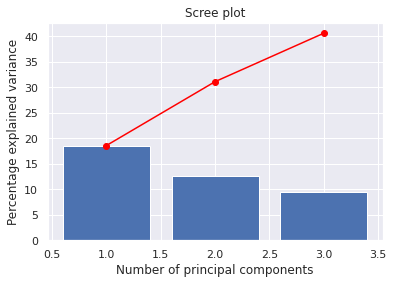

In [16]:
scree = pca_3.explained_variance_ratio_ * 100

plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(), c="red", marker='o')
plt.xlabel("Number of principal components")
plt.ylabel("Percentage explained variance")
plt.title("Scree plot")
plt.show()

### 3.3 Visualize the 3D Projection

From this resulting plot, we can observe that when we project the 14 weakest links to a three-dimensional space, the classes becomes easier to distinguish from each other than on the two-dimensional space, even though many are still very close and difficult to separate.

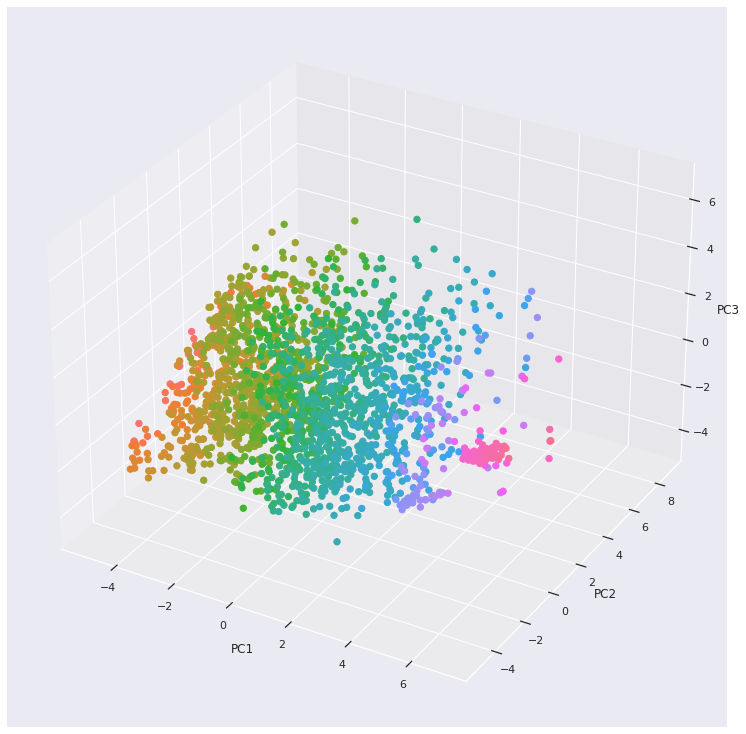

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

sc = ax.scatter(X3D_df['PC1'], X3D_df['PC2'], X3D_df['PC3'], s=40, c=X3D_df['PC1'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.savefig("scatter_hue", bbox_inches='tight')

### 3.4 Reverse the transformation and Measure the reconstruction error

The MSE is 0.59 so we're decreasing the error when adding this third principal component.

In [18]:
X3D_preimage = pca_3.inverse_transform(X3D)

mse_2 = mean_squared_error(X, X3D_preimage)
mse_2

0.5941300132078229

## 4. Dimensions that add up to 95% of the variance

### 4.1 Create the Projection

Instead of mentioning a fixed number for principal components, we want to include as many dimensions as needed to add up to 95% of the variance.

In [19]:
pca_95 = PCA(n_components=0.95)
X95 = pca_95.fit_transform(X)

In [20]:
X95_df = pd.DataFrame(data = X95)
X95_df = pd.concat([X95_df, y], axis = 1)
X95_df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,WeakLinks
0,-1.793991,0.639561,-0.461293,0.081212,0.096986,-2.062030,2.332409,-1.213111,0.589819,0.871111,...,-0.198303,0.388396,2.088019,1.682152,-0.315216,-0.566484,0.862269,0.364669,-0.661652,RightShoulderElevation
1,3.533416,-1.103300,-2.356625,1.518746,-0.676898,1.799741,-1.261700,1.267406,-0.642484,-0.444284,...,0.330612,0.625081,-0.123404,0.374085,-0.858039,0.717055,0.426816,-0.081229,-0.260831,RightArmFallForward
2,-1.942841,-1.818583,-1.283761,0.587564,0.587714,-1.334441,0.000984,-2.771462,-0.462561,0.490747,...,-1.015830,-1.042682,-0.823956,-1.319214,0.171318,-0.105659,-0.340947,0.168410,0.441495,LeftArmFallForward
3,0.199008,3.021322,0.225827,-3.782533,1.739305,1.082563,0.576988,0.775500,1.077127,0.620533,...,-0.237417,0.316851,0.172745,0.485349,0.024880,0.191054,-0.217903,0.548691,0.589365,RightShoulderElevation
4,-2.890899,-0.708689,1.629046,-0.806777,-1.809006,-0.640799,0.017528,1.456939,-1.041589,-0.098591,...,-0.313554,0.935923,0.692081,-0.568973,0.000382,-0.248489,-0.275933,0.682639,-0.492748,ForwardHead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,-1.611110,-0.340929,1.528993,2.180953,1.151633,1.071963,-3.048279,1.095047,-0.163579,-1.852022,...,-0.190876,-0.535207,-0.359882,0.299581,-0.046076,0.326261,-0.301633,0.434521,-0.130347,RightArmFallForward
2087,-3.459287,-2.567748,1.747781,-0.208314,-0.766692,0.310308,-2.358784,-0.483392,-0.473296,0.364155,...,0.349424,-0.051697,0.703595,-0.321865,0.408234,-0.120723,0.533137,-0.558896,-0.109928,LeftArmFallForward
2088,-1.352888,2.235996,4.029552,-1.566772,1.674658,0.947153,1.864874,0.409450,-0.043680,0.021630,...,-2.064184,0.393634,-0.283446,-0.061155,-0.413272,0.488409,-1.000971,0.595208,0.710454,LeftArmFallForward
2089,6.449071,-1.416190,0.728271,-1.265793,1.049975,-0.794762,0.497865,-0.526607,-0.730899,-0.107177,...,-0.305603,-0.053674,0.125906,-0.070216,-0.047635,0.051876,-0.268295,0.186756,-0.170754,RightKneeMovesOutward


### 4.2 Explained variable ratio

From this output, we can observe that the 26 first principal components add up to 95% of the variance, more precisely around 95.1% of information from the original data.

In [21]:
print('Explained variation per principal component: {} \n'.format(pca_95.explained_variance_ratio_))
print('Together they hold {:.1f}% information from the original data.'.format(np.sum(pca_95.explained_variance_ratio_) * 100))

Explained variation per principal component: [0.18573691 0.12523668 0.09489639 0.06024372 0.05170186 0.04258172
 0.03994352 0.03512245 0.0317054  0.02840868 0.02650812 0.02481172
 0.02232985 0.02004226 0.01826607 0.01676685 0.0157258  0.015322
 0.01386649 0.01369445 0.01293292 0.01222878 0.01131184 0.01084624
 0.01037393 0.0099369 ] 

Together they hold 95.1% information from the original data.


The following scree plot shows that there's very little information loss when including 26 principal components so we manage to reduce the number of variables from 40 to 26 while still remaining over 95% of the information contained within the original data.

We can also take notice that we have not yet reached any principal component where we can explain 100% of the variance, so that means we don't have any completely redundant dimensions so far.

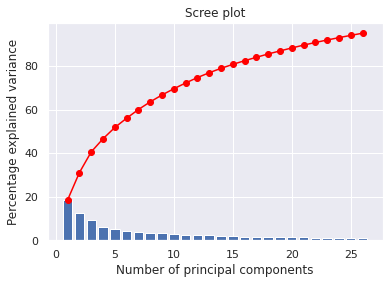

In [22]:
scree = pca_95.explained_variance_ratio_ * 100

plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(), c="red", marker='o')
plt.xlabel("Number of principal components")
plt.ylabel("Percentage explained variance")
plt.title("Scree plot")
plt.show()

### 4.3 Reverse the transformation and Measure the reconstruction error

We can't visualize this many dimensions, but we can measure the reconstruction error. 
Here, the MSE is lower than 0.05 so we are approaching a much lower value and closer to zero (i.e. perfect).

In [23]:
X95_preimage = pca_95.inverse_transform(X95)

mse_3 = mean_squared_error(X, X95_preimage)
mse_3

0.04945842152258339

## 5. Kernel PCA 2D Projection

### 5.1 Create the Projection

Kernel PCA is what we're calling PCA which uses techniques of kernel methods. This makes it possible to perform nonlinear projections for dimensionality reduction, this time with 2 dimensions. 

In [24]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', fit_inverse_transform=True)
X2D_rbf = rbf_pca.fit_transform(X)

In [25]:
X2D_rbf_df = pd.DataFrame(data = X2D_rbf, columns = ['PC1', 'PC2'])
X2D_rbf_df = pd.concat([X2D_rbf_df, y], axis = 1)
X2D_rbf_df

,PC1,PC2,WeakLinks
0,-0.160941,-0.097371,RightShoulderElevation
1,0.245758,-0.051938,RightArmFallForward
2,-0.209550,0.084578,LeftArmFallForward
3,-0.006481,-0.312732,RightShoulderElevation
4,-0.300114,0.226260,ForwardHead
...,...,...,...
2086,-0.136623,0.104383,RightArmFallForward
2087,-0.329494,0.391509,LeftArmFallForward
2088,-0.084392,-0.074006,LeftArmFallForward
2089,0.755275,0.148208,RightKneeMovesOutward


### 5.2 Visualize the 2D Projection

This resulting plot is different from the 2D projection with using normal PCA. However, it's still difficult to separate classes just by vision here.

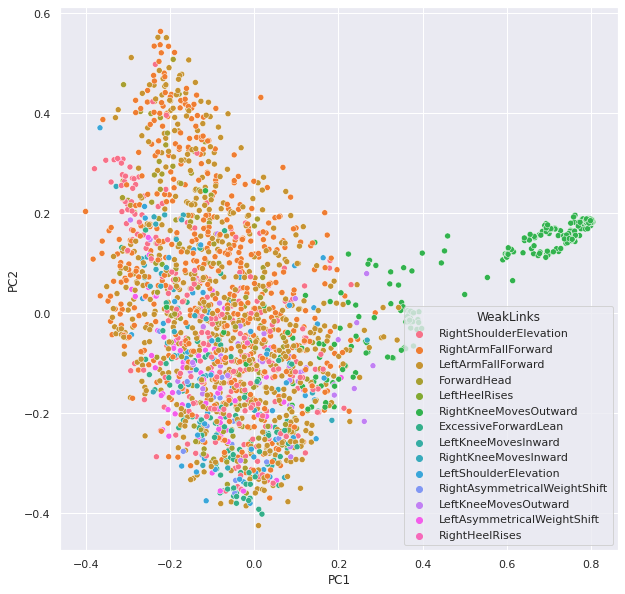

In [26]:
fig = plt.figure(figsize = (10,10))
sns.scatterplot(data=X2D_rbf_df, x="PC1", y="PC2", hue="WeakLinks")
plt.show()

### 5.3 Reverse the transformation and Measure the reconstruction error

Kernel PCA does not have *explained variance ratio* like normal PCA because after the kernel transformation, the data lives in a different feature space only limited by the number of samples. So, we go directly to measuring the reconstruction error. It is the lowest we've seen so far and a big difference from the others.

In [27]:
X2D_rbf_preimage = rbf_pca.inverse_transform(X2D_rbf)

mse_4 = mean_squared_error(X, X2D_rbf_preimage)
mse_4

7.333877252427738e-28

## 6. Kernel PCA 3D Projection

### 6.1 Create the Projection

Lastly, we take a look at kernel PCA with 3 dimensions.

In [28]:
rbf_pca_3 = KernelPCA(n_components=3, kernel='rbf', fit_inverse_transform=True)
X3D_rbf = rbf_pca_3.fit_transform(X)

In [29]:
X3D_rbf_df = pd.DataFrame(data = X3D_rbf, columns = ['PC1', 'PC2', 'PC3'])
X3D_rbf_df = pd.concat([X3D_rbf_df, y], axis = 1)
X3D_rbf_df

,PC1,PC2,PC3,WeakLinks
0,-0.160941,-0.097371,-0.020718,RightShoulderElevation
1,0.245758,-0.051938,-0.184456,RightArmFallForward
2,-0.209550,0.084578,-0.255310,LeftArmFallForward
3,-0.006481,-0.312732,0.148669,RightShoulderElevation
4,-0.300114,0.226260,0.158518,ForwardHead
...,...,...,...,...
2086,-0.136623,0.104383,0.121234,RightArmFallForward
2087,-0.329494,0.391509,0.044641,LeftArmFallForward
2088,-0.084392,-0.074006,0.351284,LeftArmFallForward
2089,0.755275,0.148208,-0.016042,RightKneeMovesOutward


### 6.2 Visualize the 2D Projection

This resulting plot is different from the 3D projection with using normal PCA and it's even better at visually separate the classes.

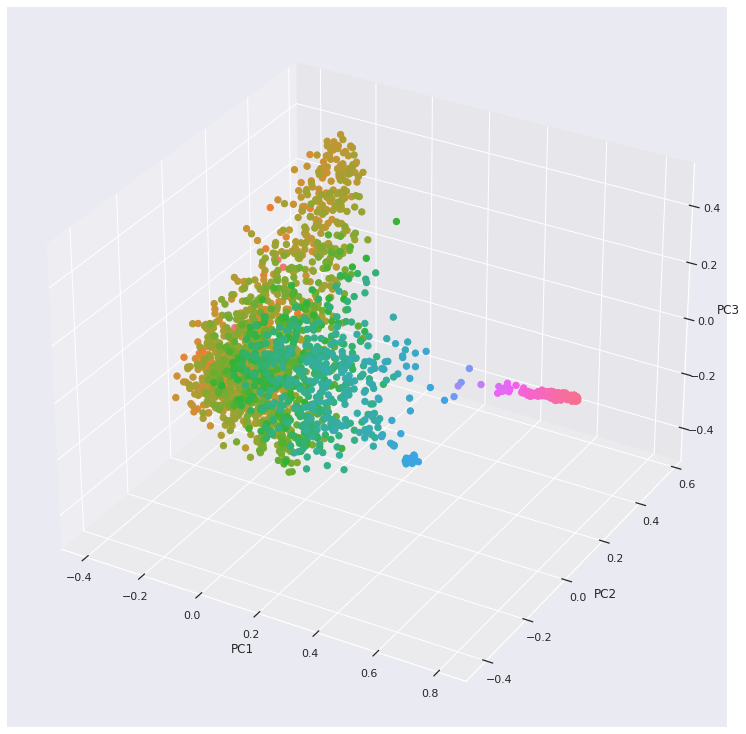

In [30]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

sc = ax.scatter(X3D_rbf_df['PC1'], X3D_rbf_df['PC2'], X3D_rbf_df['PC3'], s=40, c=X3D_rbf_df['PC1'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.savefig("scatter_hue", bbox_inches='tight')

### 6.3 Reverse the transformation and Measure the reconstruction error

Adding one more dimension to the kernel PCA (from two to three) did decrease the error value but not with as large of a difference as any of the other projections we've tried.

In [31]:
X3D_rbf_preimage = rbf_pca_3.inverse_transform(X3D_rbf)

mse_5 = mean_squared_error(X, X3D_rbf_preimage)
mse_5

6.4050410854904265e-28

## 7. Comparison of MSE

We can compare the values for MSE that we retrieved after reversing each transformation and measuring how well the information from the original data was reconstructed. The comparison highlights the amount of information loss that was present in the normal PCA two- and three dimensional projections.

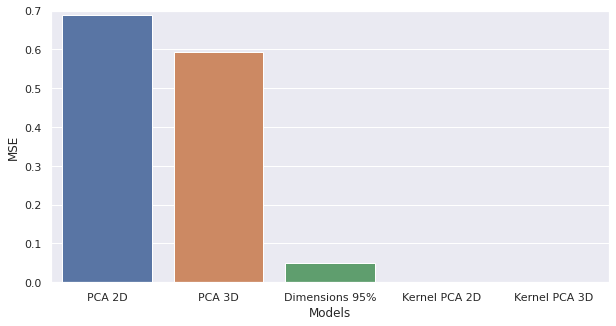

In [32]:
from sklearn.metrics import mean_squared_error

results = pd.DataFrame({
    "MSE":[mse_1, mse_2, mse_3, mse_4, mse_5],
    "Projections":["PCA 2D","PCA 3D", "Dimensions 95%", "Kernel PCA 2D", "Kernel PCA 3D"]})

results = results.sort_values("MSE", ascending=False)

fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(data=results, x="Projections", y="MSE",ax=ax)

plt.ylim(0, 0.7)

plt.xlabel("Models")
plt.ylabel("MSE")

plt.show()

## 7.1 A closer look at Kernel PCAs

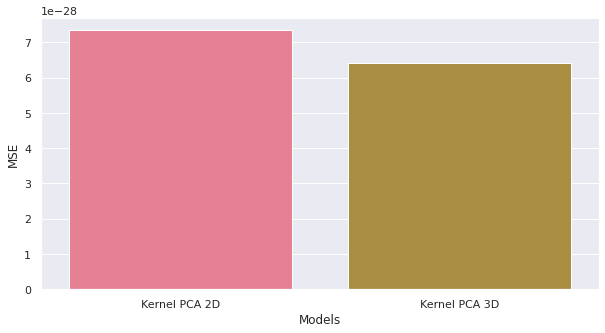

In [33]:
results = pd.DataFrame({
    "MSE":[mse_4, mse_5],
    "Projections":["Kernel PCA 2D", "Kernel PCA 3D"]})

results = results.sort_values("MSE", ascending=False)

fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(data=results, x="Projections", y="MSE",ax=ax, palette=sns.color_palette("husl"))

plt.xlabel("Models")
plt.ylabel("MSE")

plt.show()